In [8]:
import numpy as np
from scipy.special import kn
from scipy.integrate import quad
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#plt.style.use(['science', 'notebook'])

In [9]:
Gamh = 3.4e-3
mh = 125
mf = 1.28
MPL = 1.22e19
l_array = 10**np.linspace(-4.2,0.1,12)
m_array = np.arange(10,108.7, 13)

In [10]:
def H(m):
    return np.sqrt(106 * 4*np.pi**3 / 45) * m**3 / MPL

def Y0(x ,m):
    return neq(x, m) / S(x, m)

def neq(x, m):
    return 1/(2*np.pi**2) * m**3 / x * kn(2,x)

def S(x, m):
    return 105*(2*np.pi**2) / 45 * m**3 / x**3

def f(x,m):
    return S(x,m) / H(m) * neq(x,m)**(-2) * m / (63 * np.pi**4 * x)

def sigma(s, m, lam):
    x1 = lam**2 * mf**2 / np.pi
    x2 = 1/((s-mh)**2 + mh**2 * Gamh**2)
    x3 = (s-4*mf**2)**(1.5) / np.sqrt(s)
    x4 = np.sqrt(1 - 4*m**2 / s)
    return x1*x2*x3*x4

def integrand(s, x, m, lam):
    return sigma(s, m, lam) * np.sqrt(s) * kn(1, x*np.sqrt(s) / m)

def dYdx(x, Y, m, lam):
    integral = quad(integrand, 4*m**2, np.inf, args=(x, m, lam))[0]
    return -x * f(x,m) * integral * (Y**2 - Y0(x,m)**2)


In [11]:
m = 3
x = 3
lam = 1e-5

In [5]:
def Y(m, lam, span):
    result = solve_ivp(dYdx, t_span = span, y0= [Y0(span[0],m)], args=(m,lam))
    return result.t, result.y[0]

In [6]:
XX1, YY1 = Y(m=3, lam=1e-5, span=(1,100))
XX2, YY2 = Y(m=4, lam=1e-5, span=(1,100))
XX3, YY3 = Y(m=6, lam=1e-5, span=(1,100))
XX4, YY4 = Y(m=7, lam=1e-5, span=(1,100))
XX5, YY5 = Y(m=15, lam=1e-5, span=(1,100))

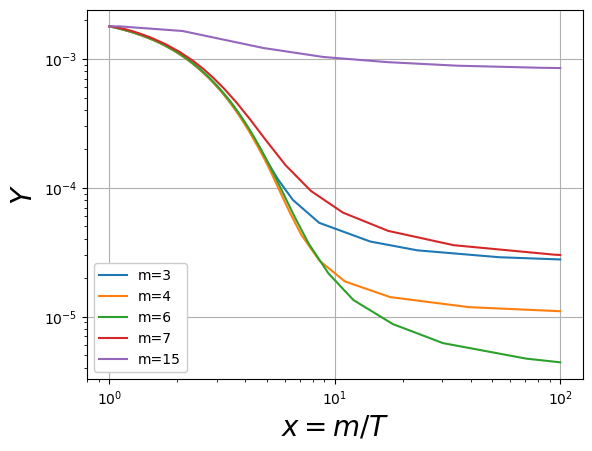

In [7]:
plt.plot(XX1, YY1, label='m=3')
plt.plot(XX2, YY2, label='m=4')
plt.plot(XX3, YY3, label='m=6')
plt.plot(XX4, YY4, label='m=7')
plt.plot(XX5, YY5, label='m=15')
plt.xlabel('$x = m/T$', fontsize=20)
plt.ylabel('$Y$', fontsize=20)
plt.grid()
plt.semilogx()
plt.semilogy()
plt.legend(facecolor='white', framealpha=1)
